<a href="https://colab.research.google.com/github/tarunteju2/tarunteju2/blob/main/PES1UG19EC328_ML_PJ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performance on validation dataset
R^2 :  0.9670199393429005
MSE : 222264.0836909871
RMSE: 471.44891949286205



Performance on test dataset
R^2 :  0.9662472177451916
MSE : 223603.87559012877
RMSE: 472.86771468364043


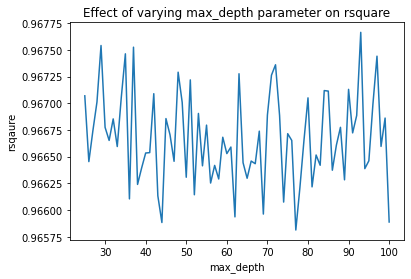

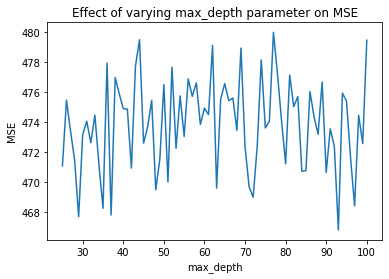

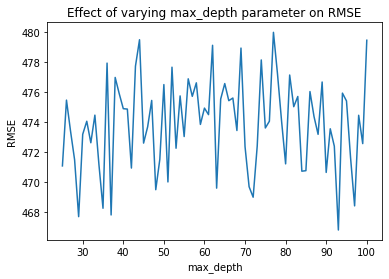

LinearRegression model performance on validation dataset
R^2 :  0.8914229566905049
MSE : 731738.4067899401
RMSE: 855.4170952172631



LinearRegression model performance on test dataset
R^2 :  0.8925845042969225
MSE : 711601.2231620194
RMSE: 843.5645933549009


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
data = pd.read_csv("/content/diamonds.csv")
data.head()
data = data.drop(["Unnamed: 0"], axis=1)
s = (data.dtypes =="object")
object_cols = list(s[s].index)
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
label_encoder = LabelEncoder()
for col in object_cols:
  data[col] = label_encoder.fit_transform(data[col])
def outlier_th(dataframe, col_name, q1, q3):
 q1 = dataframe[col_name].quantile(q1)
 q3 = dataframe[col_name].quantile(q3)
 iqr = q3 - q1
 low_limit = q1 - 1.5 * iqr
 up_limit = q3 + 1.5 * iqr

 return low_limit, up_limit
num_cols = data.keys()
for c in num_cols:
    low, up = outlier_th(data, c ,q1=0.25, q3=0.75)
    data = data[~((data[c] < low) | (data[c] > up))]
X = data.drop("price", axis = "columns")
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)
decisionModel = DecisionTreeRegressor()
decisionModel.fit(X_train,y_train)
#Preformance on validation dataset
decisionTree_val_pred = decisionModel.predict(X_val)
print("Performance on validation dataset")
print("R^2 : ", r2_score(y_val, decisionTree_val_pred))
print("MSE :", mean_squared_error(y_val, decisionTree_val_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_val, decisionTree_val_pred)))
print("\n\n")
#Performance on test dataset
decisionTree_test_pred = decisionModel.predict(X_test)
print("Performance on test dataset")
print("R^2 : ", r2_score(y_test, decisionTree_test_pred))
print("MSE :", mean_squared_error(y_test, decisionTree_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, decisionTree_test_pred)))
#Effect of varying maxDepth parameter of decison tree regressor
rsquareScore=[]
mseScore=[]
rmseScore=[]
for depth in range(25,101):
 decisionModel = DecisionTreeRegressor(max_depth=depth)
 decisionModel.fit(X_train,y_train)
 decisionTree_val_pred = decisionModel.predict(X_val)
 rsquareScore.append(r2_score(y_val, decisionTree_val_pred))
 mseScore.append(mean_squared_error(y_val, decisionTree_val_pred))
 rmseScore.append(np.sqrt(mean_squared_error(y_val, decisionTree_val_pred
)))
#Effect on rsquare
plt.plot(range(25,101),rsquareScore)
plt.ylabel("rsqaure")
plt.xlabel("max_depth")
plt.title("Effect of varying max_depth parameter on rsquare")
plt.show()
#Effect on rsquare
plt.plot(range(25,101),rmseScore)
plt.ylabel("MSE")
plt.xlabel("max_depth")
plt.title("Effect of varying max_depth parameter on MSE")
plt.show()
#Effect on rsquare
plt.plot(range(25,101),rmseScore)
plt.ylabel("RMSE")
plt.xlabel("max_depth")
plt.title("Effect of varying max_depth parameter on RMSE")
plt.show()
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
#Validation dataset accuracy
print("LinearRegression model performance on validation dataset")
print("R^2 : ", r2_score(y_val, y_pred))
print("MSE :", mean_squared_error(y_val,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_val, y_pred)))
print("\n\n")
#Test value dataset predictions
y_test_pred = model.predict(X_test)
print("LinearRegression model performance on test dataset")
print("R^2 : ", r2_score(y_test, y_test_pred))
print("MSE :", mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))